<a href="https://colab.research.google.com/github/pulkit48/Deep-Learning/blob/main/04_Methods_to_improve_performance_of_NN/10_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/concertriccir2.csv')

In [20]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


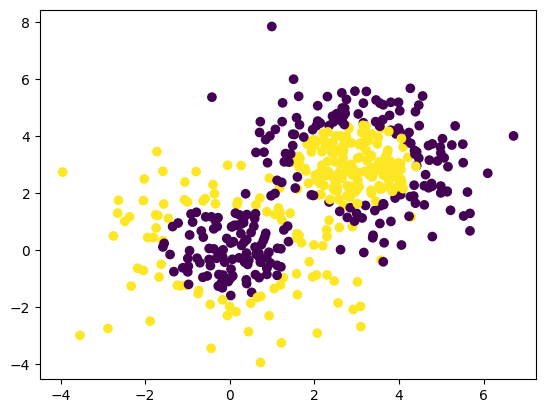

In [21]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [22]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [23]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [24]:
model=Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 0.8302 - accuracy: 0.4875 - val_loss: 1.0538 - val_accuracy: 0.5000
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8164 - accuracy: 0.4850 - val_loss: 1.0312 - val_accuracy: 0.5000
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.8044 - accuracy: 0.4825 - val_loss: 1.0102 - val_accuracy: 0.4900
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7937 - accuracy: 0.4775 - val_loss: 0.9898 - val_accuracy: 0.5000
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7825 - accuracy: 0.4675 - val_loss: 0.9737 - val_accuracy: 0.5000
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.7741 - accuracy: 0.4725 - val_loss: 0.9560 - val_accuracy: 0.4900
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7650 - accuracy: 0.4750 - val_loss: 0.9410 - val_accuracy: 0.4600
Epoch 8/200


In [27]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization_2 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_3 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 25ms/step - loss: 0.8285 - accuracy: 0.5150 - val_loss: 0.6688 - val_accuracy: 0.5500
Epoch 2/200
13/13 [==============================] - 0s 8ms/step - loss: 0.8159 - accuracy: 0.4925 - val_loss: 0.6677 - val_accuracy: 0.4900
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7979 - accuracy: 0.5525 - val_loss: 0.6665 - val_accuracy: 0.5100
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7885 - accuracy: 0.5425 - val_loss: 0.6648 - val_accuracy: 0.5000
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7988 - accuracy: 0.5200 - val_loss: 0.6633 - val_accuracy: 0.5300
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.7692 - accuracy: 0.5675 - val_loss: 0.6612 - val_accuracy: 0.5300
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7830 - accuracy: 0.5600 - val_loss: 0.6590 - val_accuracy: 0.5500
Epoch 8/200


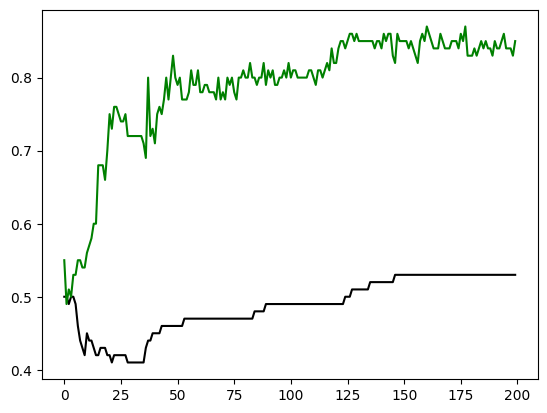

In [30]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')